In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns

## Data preprocessing

### Load the data set into a data frame

In [4]:
adultData = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', delimiter=',')

In [5]:
adultData.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
#From above we can see that there is no column names . Hence assigning the column names taken from UCI webpage
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
           'race', 'sex', 'capital-loss', 'capital-gain', 'hours-per-week', 'native-country', 'salary']

In [7]:
adultData = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names = columns)

In [8]:
adultData.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-loss,capital-gain,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
adultData.shape

(32561, 15)

## Are there any missing values in the dataset? How to handle that.

In [10]:
# We have to check the duplicate values before going further with the dataset
print(f'There are {adultData.duplicated().sum()} duplicates in the {adultData.shape[0]} rows')

There are 24 duplicates in the 32561 rows


In [11]:
# Drop the duplicate in the Dataset
adultData.drop_duplicates(inplace=True)

In [12]:
# Checking the shape of the dataset after removing the duplicates
adultData.shape

(32537, 15)

In [13]:
# Checking missing values
adultData.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-loss      0
capital-gain      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [14]:
# From above we can see that there is no missing values according to the values provided in the dataset. 
#But by checking the dataset we came to know that there are many values are embedded as '?', so we have to replace ? with Nan values before further processing.
adultData.replace(' ?', np.NaN, inplace=True)

In [15]:
adultData.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-loss         0
capital-gain         0
hours-per-week       0
native-country     582
salary               0
dtype: int64

In [16]:
# From above observation we can see that both workclass and occupation have almost same number of missing values. Lets combine 
# both of them and see the observation
adultData['workclass_occupation'] = adultData['workclass']+','+ adultData['occupation']
adultData['workclass_occupation'].value_counts()

 Private, Craft-repair             3191
 Private, Sales                    2942
 Private, Adm-clerical             2831
 Private, Other-service            2736
 Private, Exec-managerial          2690
                                   ... 
 Without-pay, Other-service           1
 Without-pay, Transport-moving        1
 Without-pay, Machine-op-inspct       1
 Without-pay, Handlers-cleaners       1
 Without-pay, Craft-repair            1
Name: workclass_occupation, Length: 81, dtype: int64

In [17]:
# We can see Private workclass with craft-repair occupation has most number of data. Lets impute them in the missing values.

adultData['workclass'].fillna('Private', inplace=True)
adultData['occupation'].fillna('Craft-repair', inplace=True)

In [18]:
# We will check the most occuring countries from dataset
adultData['native-country'].value_counts()[:2]

 United-States    29153
 Mexico             639
Name: native-country, dtype: int64

In [19]:
# Lets impute the missing native countries with united states
adultData['native-country'].fillna('United-States', inplace=True)

In [20]:
# checking the missing values
adultData.isna().sum()

age                        0
workclass                  0
fnlwgt                     0
education                  0
education-num              0
marital-status             0
occupation                 0
relationship               0
race                       0
sex                        0
capital-loss               0
capital-gain               0
hours-per-week             0
native-country             0
salary                     0
workclass_occupation    1843
dtype: int64

In [21]:
# Find the unique values and their counts in the dataset to deicde which feature to prune
for col in adultData.columns:
    print(adultData[col].value_counts())

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
Private               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
123011    13
164190    13
203488    13
113364    12
148995    12
          ..
65078      1
68318      1
284211     1
312881     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int6

In [22]:
datacopy = adultData

In [23]:
datacopy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-loss,capital-gain,hours-per-week,native-country,salary,workclass_occupation
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,"State-gov, Adm-clerical"
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,"Self-emp-not-inc, Exec-managerial"
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,"Private, Handlers-cleaners"
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,"Private, Handlers-cleaners"
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,"Private, Prof-specialty"


In [24]:
adultData.drop(['fnlwgt','capital-gain','capital-loss','workclass_occupation','native-country','age','hours-per-week','education-num'], axis=1, inplace=True)

In [25]:
adultData.head()

,workclass,education,marital-status,occupation,relationship,race,sex,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K


The variables we need are still in the categorical format. So first we convert them to numerical before finding outliers in the data.

In [26]:
df = adultData.apply(lambda x: pd.factorize(x)[0])

In [27]:
df.head()

,workclass,education,marital-status,occupation,relationship,race,sex,salary
0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0
2,2,1,2,2,0,0,0,0
3,2,2,1,2,1,1,0,0
4,2,0,1,3,2,1,1,0


<h2> Outlier Removal </h2> 

Now we have the columns we need in the format required to load into the algorithm. So we visulaize outliers and remove them for better model performance

In [28]:
# Store column names in a list for later use
cols = adultData.columns
# select columns with numerical data types
num_cols = adultData.select_dtypes(include=['int64', 'float64']).columns
# select columns with string data types
char_cols = adultData.select_dtypes(include = ['object','bool']).columns

In [29]:
print("All Column Names:",cols)
print("Numeric column names:",num_cols)
print("Character column names:",char_cols)

All Column Names: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'salary'],
      dtype='object')
Numeric column names: Index([], dtype='object')
Character column names: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'salary'],
      dtype='object')


<AxesSubplot:>

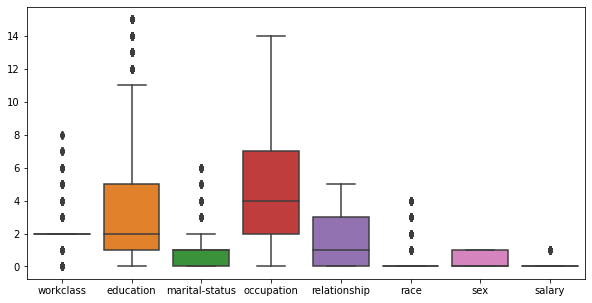

In [30]:
#Boxplot Visualization
plt.figure(figsize=(10,5))
sns.boxplot(data=df)

As we see many columns in the data have outliers. Hence we remove them using zscore formula and dropping all the rows that have values 3 standard deviations away from the mean.

In [31]:
# Now we drop outliers
from scipy import stats
df_clean=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_clean.describe()

,workclass,education,marital-status,occupation,relationship,race,sex,salary
count,29413.000000,29413.000000,29413.000000,29413.000000,29413.000000,29413.000000,29413.000000,29413.000000
mean,2.158671,3.226736,0.924761,4.669908,1.534866,0.163193,0.321049,0.239418
std,1.004418,3.148307,0.909709,3.383507,1.419032,0.448742,0.466887,0.426735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,5.000000,1.000000,7.000000,3.000000,0.000000,1.000000,0.000000
max,5.000000,13.000000,4.000000,14.000000,5.000000,2.000000,1.000000,1.000000


<AxesSubplot:>

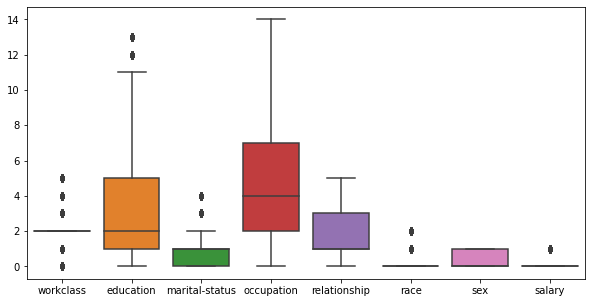

In [32]:
#Boxplot Visualization
plt.figure(figsize=(10,5))
sns.boxplot(data=df_clean)

In [33]:
# We can see the shape of the dataset before dropping outliers and after, we have dropped 3124 rows in this process.
print(df.shape,df_clean.shape)

(32537, 8) (29413, 8)


In [34]:
# Split the data into dependant and independanrt variable dataset
last_column = len(cols) - 1
y = df[cols[last_column]]
X = df.drop(cols[last_column], axis = 1)
columns = X.columns
y = pd.DataFrame(y)

In [35]:
print(X.head())
print(y.head())

   workclass  education  marital-status  occupation  relationship  race  sex
0          0          0               0           0             0     0    0
1          1          0               1           1             1     0    0
2          2          1               2           2             0     0    0
3          2          2               1           2             1     1    0
4          2          0               1           3             2     1    1
   salary
0       0
1       0
2       0
3       0
4       0


<h2> Perform Normalization of values </h2>

In [36]:
import pandas as pd
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
X.columns = columns

<AxesSubplot:>

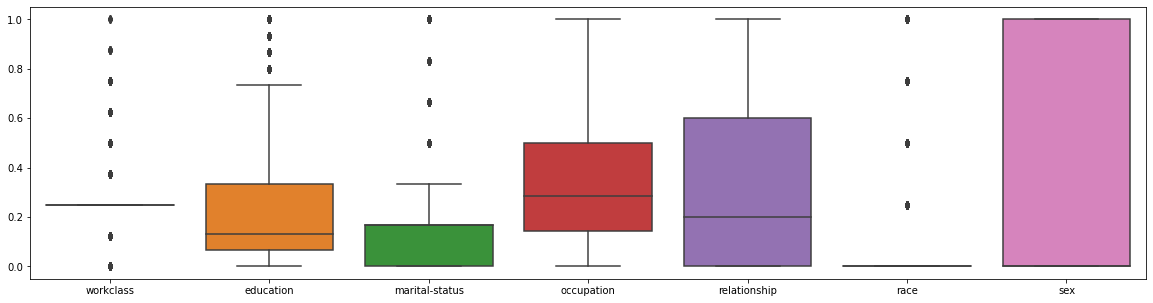

In [37]:
#Boxplot Visualization after normalization
plt.figure(figsize=(20,5))
sns.boxplot(data=X)

Afet Normalization we see that the values now range between 0 and 1 as expected.

<h2> Data Visualization </h2>

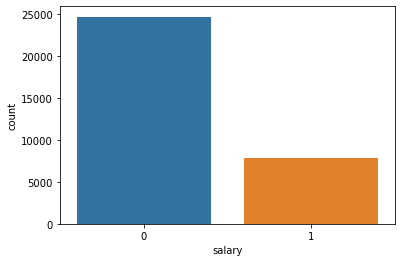

In [38]:
# Distribution of target variable 0 = <=50K
sns.countplot(x=y['salary'])
plt.show()

Plot the histogram of each column to inspect the measure of central tendencies

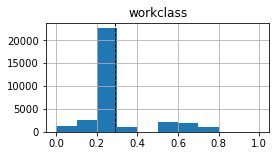

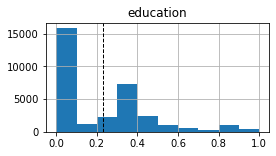

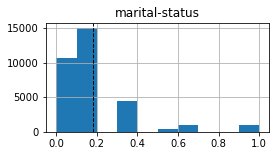

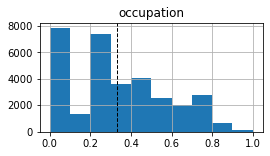

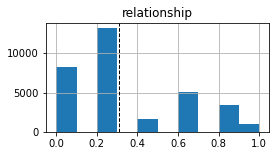

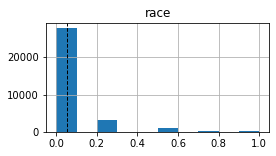

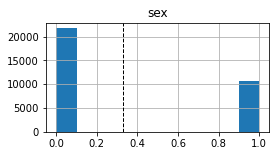

In [39]:
for col in X.columns:
    
    X[col].hist(figsize = (4,2))
    plt.axvline(X[col].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.title(col)
    plt.show()

<AxesSubplot:>

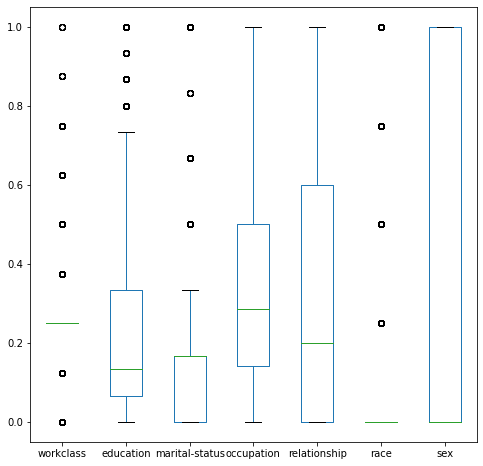

In [40]:
X.plot(kind='box', figsize=(8,8))

In [41]:
for col in X.columns:
    print(f'Mean and Std of {col} is {round(X[col].mean(),3)} and {round(X[col].std(),3)}')

Mean and Std of workclass is 0.289 and 0.153
Mean and Std of education is 0.228 and 0.23
Mean and Std of marital-status is 0.181 and 0.209
Mean and Std of occupation is 0.333 and 0.242
Mean and Std of relationship is 0.309 and 0.287
Mean and Std of race is 0.055 and 0.157
Mean and Std of sex is 0.331 and 0.47


In [42]:
def detect_outlier_iqr(data,col):
    x = np.array(data[col])
    x = np.sort(x)
    
    outlier_constant = 1.5
    Q1, Q3 = np.percentile(x, [25,75])
    IQR = Q3 - Q1
    print(f'For {col}, IQR:{round(IQR,3)},  Q3:{round(Q3,3)}, Q1:{round(Q1,3)}')
    
    return IQR, Q3, Q1

In [43]:
for col in X.columns:
    detect_outlier_iqr(X,col)

For workclass, IQR:0.0,  Q3:0.25, Q1:0.25
For education, IQR:0.267,  Q3:0.333, Q1:0.067
For marital-status, IQR:0.167,  Q3:0.167, Q1:0.0
For occupation, IQR:0.357,  Q3:0.5, Q1:0.143
For relationship, IQR:0.6,  Q3:0.6, Q1:0.0
For race, IQR:0.0,  Q3:0.0, Q1:0.0
For sex, IQR:1.0,  Q3:1.0, Q1:0.0


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd

In [45]:
def plot_dist(X,col):
    x = np.array(X[col])
    x = np.sort(x)
    outlier_constant = 1.5
    Q1, Q3 = np.percentile(x, [25,75])
    IQR = Q3 - Q1
    
    
    mean = statistics.mean(x)
    sd = statistics.stdev(x)
    
    fig, axes = plt.subplots(nrows = 1, ncols = 1)
    X[col].plot.density()
    plt.axvline(Q1, label = 'Q1',  linestyle='dashed', linewidth = 2, color='purple')
    plt.axvline(Q3, label = 'Q3',  linestyle='dashed', linewidth = 2, color='purple')
    plt.axvline(mean, label = 'mean', linestyle='dashed', linewidth = 2, color='red')
    plt.axvline(sd, label = 'sd', linestyle='dashed', linewidth = 2, color='green')
    plt.legend()
    plt.show()

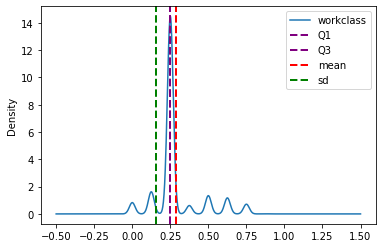

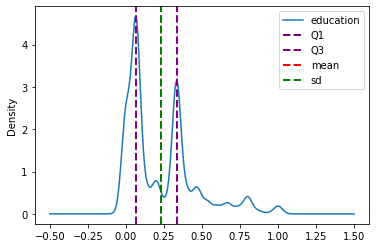

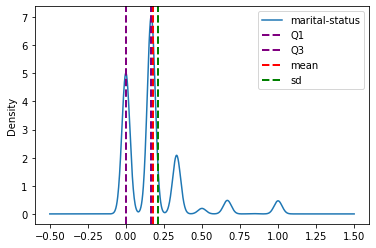

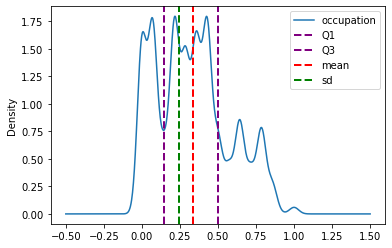

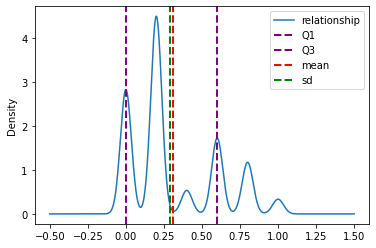

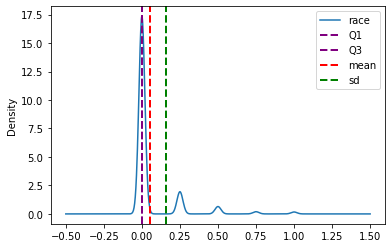

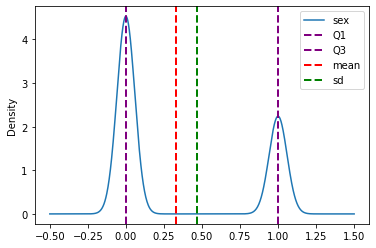

In [46]:
for col in X.columns:
    plot_dist(X,col)

<h2> Supervised Learning using Logistic Regression </h2>

In [47]:
# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# import the metrics class
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# import stats for accuracy 
import statsmodels.api as sm

In [48]:
reg = LogisticRegression()
#Split the data into 77% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
x_train[:5]

,workclass,education,marital-status,occupation,relationship,race,sex
18113,0.25,0.333333,0.000000,0.142857,0.6,0.00,0.0
17998,0.25,0.333333,0.166667,0.000000,0.4,0.25,1.0
20526,0.50,0.066667,0.166667,0.857143,0.2,0.25,0.0
4585,0.25,0.400000,0.000000,0.285714,0.0,0.00,0.0
32330,0.25,0.800000,0.333333,0.500000,0.8,0.00,0.0


In [50]:
reg.fit(x_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [51]:
#print our price predictions on our test data
y_pred = reg.predict(x_test)

In [52]:
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7543304153473644


In [53]:
cf = confusion_matrix(y_test,y_pred)
print(cf)

[[7971  168]
 [2470  129]]


Text(0.5, 1.0, 'Confusion Matrix')

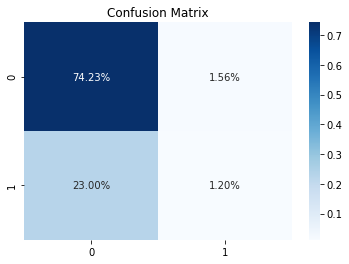

In [54]:
import seaborn as sns
sns.heatmap(cf/np.sum(cf), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")


<h2> Unsupervised Learning </h2>

In [55]:
from sklearn.cluster import KMeans

In [56]:
km = KMeans(n_clusters = 5, random_state = 21)
y_pred = km.fit_predict(df[['education', 'salary']])
centers = km.cluster_centers_
print(centers)
print(y_pred[:5])

[[ 0.66220736  0.24578785]
 [ 8.06067639  0.37466844]
 [12.64420063  0.06112853]
 [ 5.06564056  0.18684925]
 [ 2.60738714  0.35772914]]
[0 0 0 4 0]


In [57]:
df['clusters'] = y_pred
df.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,salary,clusters
0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0,0
2,2,1,2,2,0,0,0,0,0
3,2,2,1,2,1,1,0,0,4
4,2,0,1,3,2,1,1,0,0


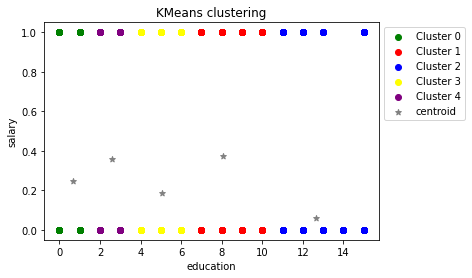

In [58]:
df1 = df[df['clusters'] == 0]
df2 = df[df['clusters'] == 1]
df3 = df[df['clusters'] == 2]
df4 = df[df['clusters'] == 3]
df5 = df[df['clusters'] == 4]

plt.scatter(df1['education'],df1['salary'], c='green',label = "Cluster 0")
plt.scatter(df2['education'],df2['salary'], c='red', label = "Cluster 1" )
plt.scatter(df3['education'],df3['salary'], c='blue', label = "Cluster 2" )
plt.scatter(df4['education'],df4['salary'], c='yellow', label = "Cluster 3" )
plt.scatter(df5['education'],df5['salary'], c='purple', label = "Cluster 4" )
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c = 'grey', marker='*',label = 'centroid')
plt.title('KMeans clustering')
plt.xlabel('education')
plt.ylabel('salary')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])

In [64]:
!pip install yellowbrick

In [69]:
#From above we can see that there is no column names . Hence assigning the column names taken from UCI webpage
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
           'race', 'sex', 'capital-loss', 'capital-gain', 'hours-per-week', 'native-country', 'salary']

In [70]:
df_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names = columns)
df_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-loss,capital-gain,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [71]:
income_level = {' <=50K':0, ' >50K':1}
df_data.salary = [income_level[item] for item in df_data.salary]
df_data.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-loss,capital-gain,hours-per-week,native-country,salary
21280,36,Federal-gov,153066,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
31170,55,Private,266343,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,46,United-States,0
1001,50,Private,168212,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,65,United-States,1
23834,49,Private,236913,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,0,0,45,United-States,0
6944,44,Private,199191,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30,United-States,0


In [72]:
X = df_data


<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

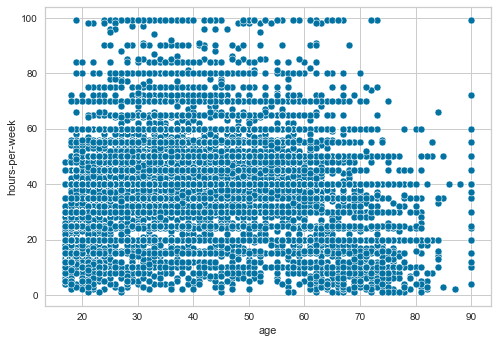

In [88]:
#distribution of age and hours per week
sns.scatterplot(x=X['age'],y=X['hours-per-week'])

In [83]:
km = KMeans(n_clusters = 4, random_state = 21)
y_pred = km.fit_predict(X[['age', 'hours-per-week']])
centers = km.cluster_centers_
print(centers)
print(y_pred[:5])

[[54.39180142 37.43629622]
 [30.80407176 41.15561379]
 [24.11583452 20.58830243]
 [41.48387097 60.15546595]]
[1 0 1 0 1]


In [84]:
X['clusters'] = y_pred
X.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-loss,capital-gain,hours-per-week,native-country,salary,clusters
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,1


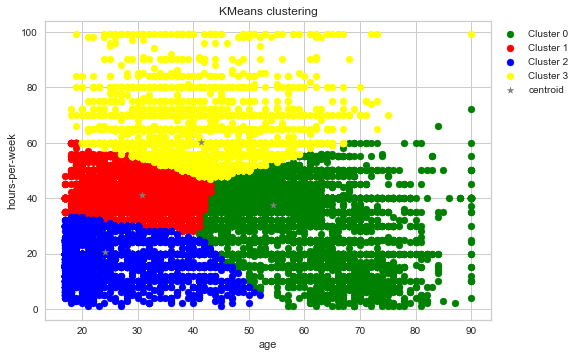

In [87]:
df1 = X[X['clusters'] == 0]
df2 = X[X['clusters'] == 1]
df3 = X[X['clusters'] == 2]
df4 = X[X['clusters'] == 3]

plt.scatter(df1['age'],df1['hours-per-week'], c='green',label = "Cluster 0")
plt.scatter(df2['age'],df2['hours-per-week'], c='red', label = "Cluster 1" )
plt.scatter(df3['age'],df3['hours-per-week'], c='blue', label = "Cluster 2" )
plt.scatter(df4['age'],df4['hours-per-week'], c='yellow', label = "Cluster 3" )
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c = 'grey', marker='*',label = 'centroid')
plt.title('KMeans clustering')
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])

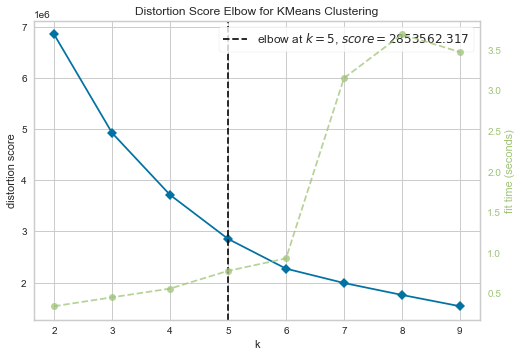

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=None)

In [86]:
import yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Instantiate the clustering model and visualizer
model = KMeans()
kelbow_visualizer(KMeans(random_state=4), X[['age','hours-per-week']], k=(2,10))

In [80]:
km = KMeans(n_clusters = 5, random_state = 21)
y_pred = km.fit_predict(X[['age', 'hours-per-week']])
centers = km.cluster_centers_
print(centers)
print(y_pred[:5])

[[30.11907638 41.3877087 ]
 [65.59378882 20.5447205 ]
 [50.49312016 41.67800388]
 [23.82020845 20.74580197]
 [39.76821406 64.24951644]]
[0 1 0 2 0]


In [81]:
X['clusters'] = y_pred
X.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-loss,capital-gain,hours-per-week,native-country,salary,clusters
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,2
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0


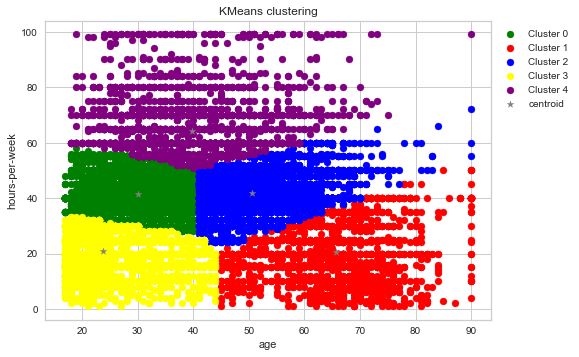

In [82]:
df1 = X[X['clusters'] == 0]
df2 = X[X['clusters'] == 1]
df3 = X[X['clusters'] == 2]
df4 = X[X['clusters'] == 3]
df5 = X[X['clusters'] == 4]

plt.scatter(df1['age'],df1['hours-per-week'], c='green',label = "Cluster 0")
plt.scatter(df2['age'],df2['hours-per-week'], c='red', label = "Cluster 1" )
plt.scatter(df3['age'],df3['hours-per-week'], c='blue', label = "Cluster 2" )
plt.scatter(df4['age'],df4['hours-per-week'], c='yellow', label = "Cluster 3" )
plt.scatter(df5['age'],df5['hours-per-week'], c='purple', label = "Cluster 4" )
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c = 'grey', marker='*',label = 'centroid')
plt.title('KMeans clustering')
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])